In [1]:
from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

단일 모델의 정확도 측정

In [6]:
dtree = tree.DecisionTreeClassifier(criterion="gini", max_depth=8,
                                   max_features=32, random_state=35)
dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn=KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

print("[accuracy]")
print("d-tree : ", accuracy_score(y_test, dtree_predicted))
print("knn    : ", accuracy_score(y_test, knn_predicted))
print("svm    : ", accuracy_score(y_test, svm_predicted))

[accuracy]
d-tree :  0.8305555555555556
knn    :  0.8694444444444445
svm    :  0.9194444444444444


분류값별 확률 확인

In [8]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[5.46707720e-04 1.82618720e-04 3.13521042e-04 1.34435971e-04
  9.96816193e-01 5.31702182e-04 4.31771184e-04 4.70496707e-04
  3.02725942e-04 2.69827851e-04]
 [9.99988388e-01 3.54476225e-07 7.69902979e-07 5.91465654e-07
  5.53522512e-07 4.52940060e-07 5.70376448e-06 1.25307462e-06
  1.03848607e-06 8.94463394e-07]]


하드 보팅

In [11]:
voting_clf = VotingClassifier(estimators = [
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1,1,1], voting='hard').fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

/Users/jungheekang/anaconda3/envs/wikiml/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.925

소프트 보팅

In [15]:
voting_clf = VotingClassifier(estimators = [
    ('decision_tree', dtree), ('knn', knn), ('svm', svm)],
    weights = [1,1,1], voting='soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)



/Users/jungheekang/anaconda3/envs/wikiml/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9111111111111111

단일 모델과 앙상블 모델의 정확도 비교 시각화

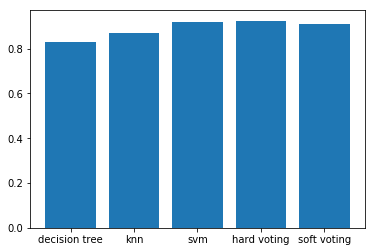

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height = [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])

plt.xticks(x, ['decision tree', 'knn', 'svm', 'hard voting', 'soft voting']);